<a href="https://colab.research.google.com/github/joi0804/pdm09/blob/main/project/dogsNcats/dogsNcats_DL3_TL_save_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dogsNcats
- ## Transfer Learning

In [1]:
# Down PetImages.zip from Google drive
!gdown https://drive.google.com/uc?id=1VEs5Hz2iThTqP_mRoxQgl8PrZVjwszod

Downloading...
From: https://drive.google.com/uc?id=1VEs5Hz2iThTqP_mRoxQgl8PrZVjwszod
To: /content/PetImages.zip
100% 70.4M/70.4M [00:00<00:00, 293MB/s]


In [2]:
!unzip PetImages.zip -d PetImages
# !unzip -q PetImages.zip -d PetImages

Archive:  PetImages.zip
   creating: PetImages/test/
   creating: PetImages/test/cat/
  inflating: PetImages/test/cat/9909.jpg  
  inflating: PetImages/test/cat/991.jpg  
  inflating: PetImages/test/cat/9910.jpg  
  inflating: PetImages/test/cat/9911.jpg  
  inflating: PetImages/test/cat/9912.jpg  
  inflating: PetImages/test/cat/9913.jpg  
  inflating: PetImages/test/cat/9914.jpg  
  inflating: PetImages/test/cat/9915.jpg  
  inflating: PetImages/test/cat/9916.jpg  
  inflating: PetImages/test/cat/9917.jpg  
  inflating: PetImages/test/cat/9918.jpg  
  inflating: PetImages/test/cat/9919.jpg  
  inflating: PetImages/test/cat/992.jpg  
  inflating: PetImages/test/cat/9920.jpg  
  inflating: PetImages/test/cat/9921.jpg  
  inflating: PetImages/test/cat/9922.jpg  
  inflating: PetImages/test/cat/9923.jpg  
  inflating: PetImages/test/cat/9924.jpg  
  inflating: PetImages/test/cat/9925.jpg  
  inflating: PetImages/test/cat/9926.jpg  
  inflating: PetImages/test/cat/9927.jpg  
  inflating: 

In [3]:
import os
path = 'PetImages'
# 서브 디렉토리별 파일 개수 출력
for root, subdirs, files in os.walk(path):
    if len(files) > 0:
        print(root, len(files))

PetImages 1
PetImages/train 1
PetImages/train/cat 1000
PetImages/train/dog 1000
PetImages/test/cat 100
PetImages/test/dog 100


In [4]:
# import
import matplotlib.pyplot as plt 
from matplotlib.image import imread
# import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import models, layers


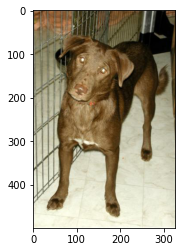

In [5]:
# sample image
image = imread('PetImages/train/dog/1.jpg')
image.shape
plt.imshow(image)
plt.show()

Image shape: (375, 500, 3)


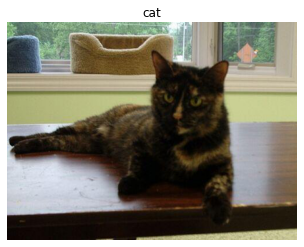

In [6]:
# View a random image
train_dir = './PetImages/train'
test_dir = './PetImages/test'
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir = train_dir, target_class = "cat")
# img = tensorflow.constant(img)
plt.show()


## tensorflow dataset from local images

In [7]:
#
# Setting up the data
#
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMG_SIZE = (128, 128)
batchSize=20

print("Training Images:")
train_data = image_dataset_from_directory(directory = train_dir,
                                            image_size = IMG_SIZE,
                                            label_mode = "binary",
                                            color_mode = "rgb",
                                            batch_size = batchSize)

print("Testing Images:")
test_data = image_dataset_from_directory(directory = test_dir,
                                            image_size = IMG_SIZE,
                                            label_mode = "binary",
                                            color_mode = "rgb",
                                            batch_size = batchSize)

# Inspecting the train_data
train_data   # BatchDataset
# <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), 
# TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


Training Images:
Found 2000 files belonging to 2 classes.
Testing Images:
Found 200 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Visualize images from dataset

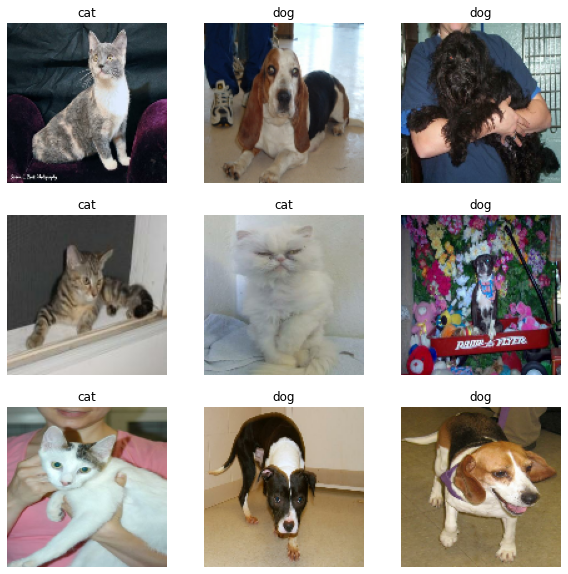

==================== Test dataset ====================


In [8]:
# Plot images from dataset
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
names = ['cat','dog']
# 배치 하나를 가져옵니다.
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

# [DIY] Plot images from test dataset
print("="*20, 'Test dataset', "="*20)


## Data Augmentation

In [9]:
#
# Data augmentation
#
# Create a data augmentation stage with horizontal flipping, rotations, zooms
#
tensorflow.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation

# from tensorflow import keras
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),  # Not compatible with model
  layers.RandomWidth(0.2),
  # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


### Visualize the augmented images

========================= Train dataset =========================
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(20, 1), dtype=float32) (20, 128, 128, 3)
(1, 149, 103, 3)
(1, 107, 114, 3)
(1, 129, 124, 3)
(1, 149, 140, 3)
(1, 124, 146, 3)
(1, 127, 128, 3)
(1, 116, 150, 3)
(1, 118, 105, 3)
(1, 147, 109, 3)


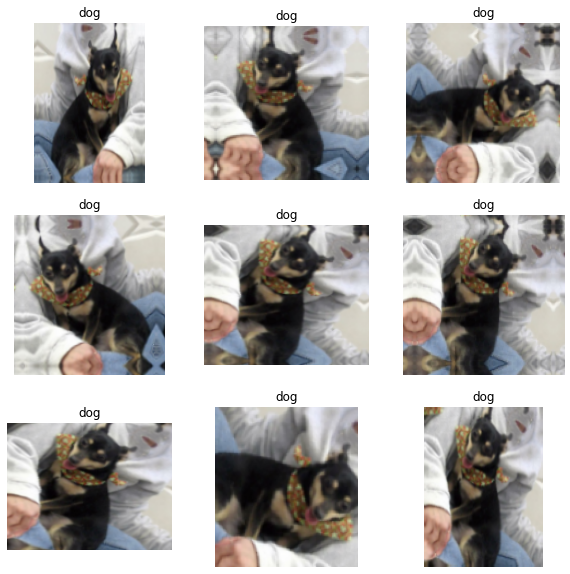

========================= Test dataset =========================
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]], shape=(20, 1), dtype=float32) (20, 128, 128, 3)
(1, 143, 135, 3)
(1, 114, 130, 3)
(1, 142, 138, 3)
(1, 129, 130, 3)
(1, 131, 143, 3)
(1, 119, 115, 3)
(1, 139, 115, 3)
(1, 149, 148, 3)
(1, 105, 106, 3)


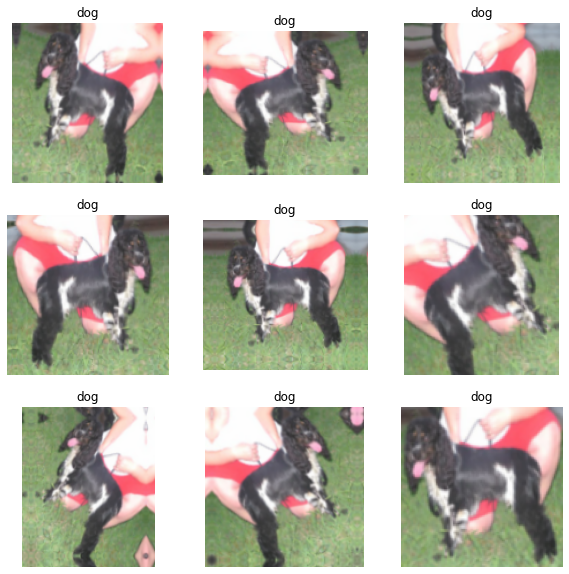

In [10]:
#
# Visualize the augmented images
#
print("="*25, 'Train dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 0
for images, labels in train_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

print("="*25, 'Test dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 0
for images, labels in test_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

# Model: Transfer learning
- ## EfficientNetB1

In [25]:
#
# Transfer learning
#
## Using the model EfficientNetB1 for the first experiment with all the layers trainable 
#
base_model = keras.applications.EfficientNetB1(include_top = False)
base_model.trainable = True 
# Check the input and output of the pretraioned model
# print(base_model.input.shape)
# print(base_model.output.shape)

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.trainable, end=", ")


0 True, 1 True, 2 True, 3 True, 4 True, 5 True, 6 True, 7 True, 8 True, 9 True, 10 True, 11 True, 12 True, 13 True, 14 True, 15 True, 16 True, 17 True, 18 True, 19 True, 20 True, 21 True, 22 True, 23 True, 24 True, 25 True, 26 True, 27 True, 28 True, 29 True, 30 True, 31 True, 32 True, 33 True, 34 True, 35 True, 36 True, 37 True, 38 True, 39 True, 40 True, 41 True, 42 True, 43 True, 44 True, 45 True, 46 True, 47 True, 48 True, 49 True, 50 True, 51 True, 52 True, 53 True, 54 True, 55 True, 56 True, 57 True, 58 True, 59 True, 60 True, 61 True, 62 True, 63 True, 64 True, 65 True, 66 True, 67 True, 68 True, 69 True, 70 True, 71 True, 72 True, 73 True, 74 True, 75 True, 76 True, 77 True, 78 True, 79 True, 80 True, 81 True, 82 True, 83 True, 84 True, 85 True, 86 True, 87 True, 88 True, 89 True, 90 True, 91 True, 92 True, 93 True, 94 True, 95 True, 96 True, 97 True, 98 True, 99 True, 100 True, 101 True, 102 True, 103 True, 104 True, 105 True, 106 True, 107 True, 108 True, 109 True, 110 True, 

In [26]:
model = keras.Sequential([
  layers.Input(shape=(128,128,3),name='input_layer'),
  # layers.Rescaling(1./255),
  data_augmentation,
  # layers.Conv2D(20,3,activation='relu',padding='same'),
  base_model,  # (128,128,3) => (4,4,1280)
  layers.GlobalMaxPooling2D(name = "global_max"),
  layers.Dense(128,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 128, 128, 3)      0         
 al)                                                             
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_max (GlobalMaxPoolin  (None, 1280)             0         
 g2D)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,739,336
Trainable params: 6,677,281
No

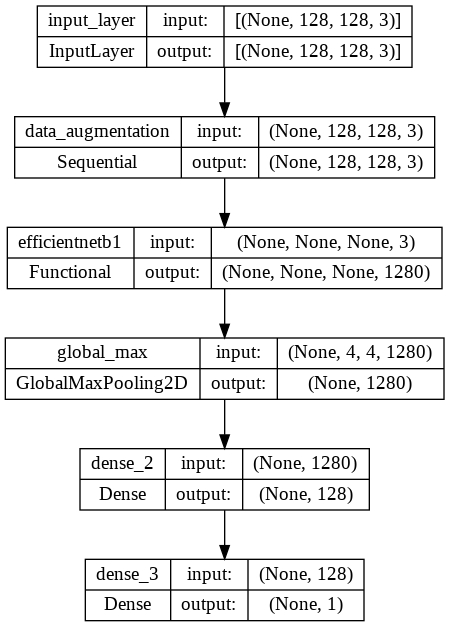

In [27]:
# from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [28]:
len(train_data),len(test_data)  # 2000/20, 200/20, batch_size=20

(100, 10)

# Building the Model

In [29]:
# Setting up the callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 10 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=5,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)
# Check the best model and save the best model
cp_callback = keras.callbacks.ModelCheckpoint(filepath="./model/dogsNcats_TL_efficientNetB1_best_weights.{epoch:02d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)

## Check the summary
for no, layer in enumerate(model.layers):
  print(no, layer.trainable)


0 True
1 True
2 True
3 True
4 True


In [30]:
######################################################
# Training model using augmentated data
######################################################
#
%%time
history = model.fit(train_data, 
                    epochs=100, 
                    steps_per_epoch = len(train_data), 
                    validation_data = test_data,
                    validation_steps = len(test_data), # batchSize,
                    callbacks = [cp_callback, early_stopping, reduce_lr])


Epoch 1/100
100/100 [==============================] - 30s 173ms/step - loss: 0.5810 - accuracy: 0.7185 - val_loss: 0.2248 - val_accuracy: 0.8950 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - 15s 150ms/step - loss: 0.4070 - accuracy: 0.8340 - val_loss: 0.2093 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 3/100
100/100 [==============================] - 14s 142ms/step - loss: 0.3321 - accuracy: 0.8570 - val_loss: 0.2610 - val_accuracy: 0.9000 - lr: 1.0000e-04
Epoch 4/100
100/100 [==============================] - 15s 150ms/step - loss: 0.2866 - accuracy: 0.8770 - val_loss: 0.2650 - val_accuracy: 0.8950 - lr: 1.0000e-04
Epoch 5/100
100/100 [==============================] - 15s 144ms/step - loss: 0.2716 - accuracy: 0.8835 - val_loss: 0.2235 - val_accuracy: 0.9150 - lr: 1.0000e-04
Epoch 6/100
100/100 [==============================] - 15s 144ms/step - loss: 0.2324 - accuracy: 0.8985 - val_loss: 0.2580 - val_accuracy: 0.9050 - lr: 1.0000e-04
Epoch 7/100
100/100 [=

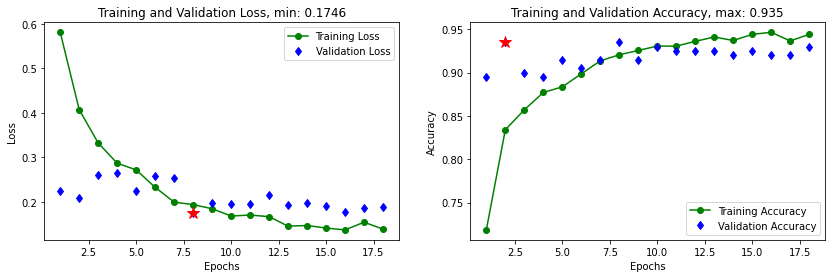

In [31]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Trained well!

---

In [32]:
model.evaluate(test_data)

10/10 [==============================] - 1s 35ms/step - loss: 0.1875 - accuracy: 0.9300


[0.18753942847251892, 0.9300000071525574]

In [33]:
pred = model.predict(test_data)

10/10 [==============================] - 2s 32ms/step


In [34]:
pred.shape,pred[:10]

((200, 1), array([[8.8445151e-01],
        [1.8123299e-05],
        [2.4447469e-05],
        [2.6357062e-05],
        [8.2552892e-01],
        [9.6453321e-01],
        [9.9252409e-01],
        [1.5864340e-07],
        [1.7770674e-02],
        [7.3363481e-05]], dtype=float32))

## CONFUSION MATRIX

In [35]:
# Correct-handling with tf_dataset - test_data,unbatch()
from sklearn.metrics import confusion_matrix

y_test=[]
y_pred=[]
for images, labels in test_data.unbatch():   # 개개의 이미지에 대한 예측과 label에 수집
    # print(images.shape,labels.shape)
    y_pred0 = model.predict(np.expand_dims(images, axis=0), verbose=0) #, batch_size=1)  
    y_pred.append(np.round(y_pred0[0]))  #, axis=0)
    y_test.append(labels.numpy())
    # break

print(len(y_test),len(y_pred))
# print(y_test.shape,y_pred.shape)

print("정답=", y_test[0])
print("예측값=", y_pred[0]) #, np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

200 200
정답= [1.]
예측값= [1.]
0.93


array([[98,  2],
       [12, 88]])

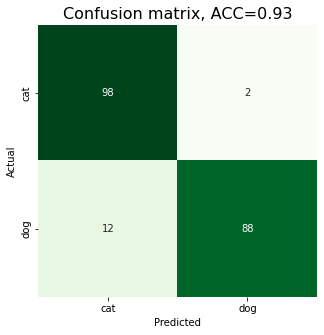

In [36]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=names, yticklabels=names, fmt='d', annot=True, cmap=plt.cm.Greens) #coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix, ACC={acc}', fontsize=16)
plt.show()

## [DIY] 학습된 best model을 이용해서 혼동행렬을 구하시오.
### Best model saved,
- dogsNcats_TL_efficientNetB1_best_weights.12-0.945.hdf5

In [38]:
from keras.models import load_model

model_best = load_model('model/dogsNcats_TL_efficientNetB1_best_weights.12-0.945.hdf5')
# model_best.evaluate(X_test, y_test)  #, batch_size=BATCH_SIZE)

In [39]:
# Correct-handling with tf_dataset - test_data,unbatch()
import tensorflow as tf

y_test=[]
y_pred=[]
# X_test = tf.zeros(shape=(128,128,3), name=None)  #
X_test = np.empty((128,128,3), int)

# Best model로 전체 테스트 batch에 대하여 다시 예측을 실시함.
for image, label in test_data.unbatch():   # 개개의 이미지에 대한 예측과 label 수집하면서 test 데이터를 X_test 로 저장
    # print(images.shape,labels.shape)
    y_pred0 = model_best.predict(np.expand_dims(image, axis=0), verbose=0) #, batch_size=1)  
    y_pred.append(np.round(y_pred0[0]))  #, axis=0)
    y_test.append(label.numpy())
    X_test = np.vstack([X_test,image])  #, axis=0)
#     tf.stack([X_test, image], axis=0)
    # break

X_test = X_test.reshape(-1,128,128,3)
X_test=X_test[1:]
y_test = [int(i) for i in y_test]
y_pred = [int(i) for i in y_pred]
print(len(y_test),len(y_pred), X_test.shape)
# print(y_test.shape,y_pred.shape)

print("정답=", y_test[0])
print("예측값=", y_pred[0]) #, np.round(y_pred0[0]))



200 200 (200, 128, 128, 3)
정답= 1
예측값= 1


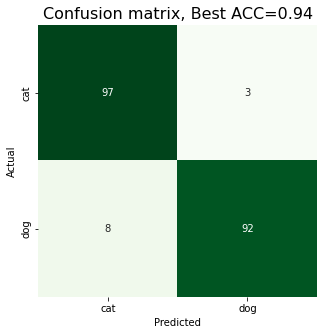

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=names, yticklabels=names, fmt='d', annot=True, cmap=plt.cm.Greens) #coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix, Best ACC={round(acc,2)}', fontsize=16)
plt.show()

---

## test of the best model

In [41]:
import matplotlib as mpl
def plot_pred(i, predictions, true_labels, img):
    predicted_label, true_label, img = predictions[i], true_labels[i], img[i]
    print(img.shape)
    if predicted_label == true_label:   # np.argmax(true_label)
        mpl.rc('text', color='green')
        print("Test image-%d: Correct!\n" % i)
    else:
        mpl.rc('text', color='red')
        print("Test image-%d: Wrong.\n" % i)
    
    plt.pause(0.05)
    plt.grid(False)
#     plt.title(names[true_label])
    plt.xticks([])
    plt.yticks([])
    plt.title(names[true_label])
    plt.imshow(img/255.0)
    

(128, 128, 3)
Test image-43: Correct!



<Figure size 288x288 with 0 Axes>

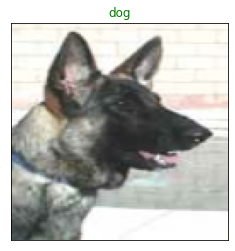

In [42]:
# predictions = model_best.predict(X_test) => y_pred
np.random.seed(None)
num = np.random.randint(0, len(X_test))

plt.figure(figsize=(4, 4))
# plt.subplot(1, 2, (1, 2))
plot_pred(num, y_pred, y_test, X_test)

plt.show()

---
## **전이(전환)학습 방법**
1. 데이터 수집
2. 데이터세트 구성 (train,test,validation): tf.keras.preprocessing.image_dataset_from_directory
3. 데이터 증대 (Data augmentation)
4. 모델 구성: imagenet 모델 연결, 레이어 학습 조건 설정
5. 콜백 조건 설정
6. 모델 학습 및 테스트
    - steps_per_epoch = len(train_data)
    - validation_data = test_data
    - validation_steps = len(test_data)

> steps_per_epoch를 전체데이터의 길이로 설정: 학습 시간이 길어지나 작을 val_loss를 가진 모델을 구할 수 있디.
> validation_steps은 테스트데이터 길이의 25~100으로 조정 가능 %